In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import json
import sklearn

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import LabelEncoder

In [7]:
note = pd.read_json("data_4.txt")

In [8]:
note

,game,rank,gold,rerolls,units,player,move_freq,main_trait,level_one,level_two,level_three,rarity_one,rarity_two,rarity_three,rarity_four,rarity_five
1,VN1_3655815269,4,298,49,49,7863217,25,Set3_Celestial,1,7,0,2,2,1,2,1
2,VN1_3655805705,3,335,38,51,18250278,31,Battlecast,2,5,2,2,1,2,3,1
3,VN1_3655815278,3,235,59,45,14856370,50,Set3_Blademaster,0,5,2,3,1,1,2,0
4,VN1_3655815321,1,421,39,65,1812899,37,Sniper,1,9,0,1,1,1,4,3
5,VN1_3655806749,7,326,61,79,605012,43,DarkStar,3,4,2,2,1,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101996,VN1_3663238429,8,237,24,49,31084573,26,Set3_Brawler,1,8,0,2,2,2,2,1
101997,VN1_3663237119,2,398,35,80,60234352,16,Vanguard,1,8,1,3,3,1,1,2
101998,VN1_3663225418,3,347,73,59,58208651,27,Chrono,1,7,0,0,2,1,4,1
101999,VN1_3663226957,7,322,27,62,59616094,11,Set3_Mystic,1,5,1,0,1,3,3,0


In [5]:
note["rank"]

note["gold"]

note["rerolls"]

note["units"]

1         49
2         51
3         45
4         65
5         79
          ..
101996    49
101997    80
101998    59
101999    62
102000    79
Name: units, Length: 102000, dtype: int64

In [83]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

note[['gold', 'rerolls', 'units', 'move_freq']] = scaler.fit_transform(note[['gold', 'rerolls', 'units', 'move_freq']])

X = note[['gold', 'rerolls', 'units', 'move_freq', 'main_trait_encoded']]

X = note[['gold', 'rerolls', 'units', 'move_freq', 'main_trait']]
# labelencoder = LabelEncoder()
# note['main_trait_encoded'] = labelencoder.fit_transform(note['main_trait'])


X = pd.get_dummies(X)

X = X.drop(columns=['main_trait_Vanguard'])
X

# y = note[['rank']]

# X = X.to_numpy()

# y = y.to_numpy()


,gold,rerolls,units,move_freq,main_trait_Astro,main_trait_Battlecast,main_trait_Blaster,main_trait_Chrono,main_trait_Cybernetic,main_trait_DarkStar,...,main_trait_Rebel,main_trait_Set3_Blademaster,main_trait_Set3_Brawler,main_trait_Set3_Celestial,main_trait_Set3_Mystic,main_trait_Set3_Sorcerer,main_trait_Sniper,main_trait_SpacePirate,main_trait_StarGuardian,main_trait_Starship
1,0.018201,0.019014,0.098592,0.190840,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.020476,0.014746,0.102616,0.236641,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.014327,0.022895,0.090543,0.381679,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0.025764,0.015134,0.130785,0.282443,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0.019923,0.023671,0.158954,0.328244,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101996,0.014450,0.009313,0.098592,0.198473,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
101997,0.024350,0.013582,0.160966,0.122137,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101998,0.021214,0.028328,0.118712,0.206107,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
101999,0.019677,0.010477,0.124748,0.083969,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


[-2.50323552e+01  2.79055376e+00 -1.19529558e+01  3.99730008e-02
 -1.74344239e-01 -1.33461433e-03 -1.84285521e-02 -1.05415962e-01
 -4.40522501e-02 -1.92277180e-02 -2.60494381e-01 -1.35971490e-02
  6.30085170e-01 -1.33293908e-01 -1.11775934e-01 -4.62725252e-02
 -2.80766272e-01 -1.81128381e-02 -3.26415653e-02 -1.86094399e-02
 -6.81954198e-02 -1.56353677e-02 -1.15236987e-01  2.71319536e-02
 -7.90562401e-02 -4.42161277e-02 -1.30371134e-02 -1.87265424e-01]
Feature: 0, Score: -25.03236
Feature: 1, Score: 2.79055
Feature: 2, Score: -11.95296
Feature: 3, Score: 0.03997
Feature: 4, Score: -0.17434
Feature: 5, Score: -0.00133
Feature: 6, Score: -0.01843
Feature: 7, Score: -0.10542
Feature: 8, Score: -0.04405
Feature: 9, Score: -0.01923
Feature: 10, Score: -0.26049
Feature: 11, Score: -0.01360
Feature: 12, Score: 0.63009
Feature: 13, Score: -0.13329
Feature: 14, Score: -0.11178
Feature: 15, Score: -0.04627
Feature: 16, Score: -0.28077
Feature: 17, Score: -0.01811
Feature: 18, Score: -0.03264
Feat

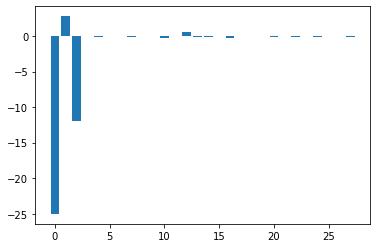

In [84]:
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_

print(importance[0])

#summarize feature importance
for i,v in enumerate(importance[0]):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance[0]))], importance[0])
pyplot.show()

In [ ]:
full_data = pd.read_json("data.txt", orient = "index")

full_data

In [ ]:
move_freq = pd.read_json("move_freq.txt", orient = "index")

move_freq

In [ ]:
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()